# Data Project - Stock Market Analysis 



Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

***   

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
!pip install -q yfinance

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data
import yfinance as yf

# For time stamps
from datetime import datetime

# Only Amazon stock
stock = 'AMZN'

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download AMZN stock data
amzn = yf.download(stock, start, end)

# Add company name column
amzn['company_name'] = 'AMAZON'

# Display last 10 rows
amzn.tail(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,company_name
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,
Date,,,,,,
2025-03-12,198.889999,201.520004,195.289993,200.720001,43679300,AMAZON
2025-03-13,193.889999,198.880005,191.820007,198.169998,41270800,AMAZON
2025-03-14,197.949997,198.649994,195.320007,197.410004,38096700,AMAZON
2025-03-17,195.740005,199.000000,194.320007,198.770004,47341800,AMAZON
2025-03-18,192.820007,194.000000,189.380005,192.520004,40414900,AMAZON
2025-03-19,195.539993,195.970001,191.960007,193.380005,39442900,AMAZON
2025-03-20,194.949997,199.320007,192.300003,193.070007,38921100,AMAZON
2025-03-21,196.210007,196.990005,192.520004,192.899994,60056900,AMAZON


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [14]:
# Summary Stats
amzn.describe()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,196.468680,198.558760,194.151240,196.560760,3.982022e+07
std,19.230675,19.319516,19.040245,19.158471,1.573373e+07
min,161.020004,162.960007,151.610001,154.210007,1.500750e+07
25%,182.889999,184.944996,180.890003,182.910004,3.010568e+07
50%,188.905006,190.670006,186.954994,189.224998,3.636795e+07
75%,208.867504,212.527496,206.745003,209.212494,4.296842e+07
max,242.059998,242.520004,238.029999,239.020004,1.414484e+08


We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [15]:
# General info
amzn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-03-26 to 2025-03-25
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AMZN)     250 non-null    float64
 1   (High, AMZN)      250 non-null    float64
 2   (Low, AMZN)       250 non-null    float64
 3   (Open, AMZN)      250 non-null    float64
 4   (Volume, AMZN)    250 non-null    int64  
 5   (company_name, )  250 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

<Figure size 1200x600 with 0 Axes>

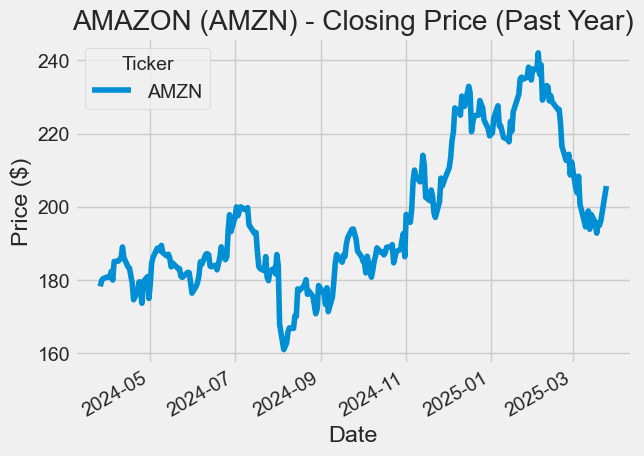

In [21]:
# Plot Adjusted Close Price (check for both 'Adj Close' and 'Adj_Close')
plt.figure(figsize=(12, 6))

# Check which column name exists
if 'Adj Close' in amzn.columns:
    amzn['Adj Close'].plot()
elif 'Adj_Close' in amzn.columns:
    amzn['Adj_Close'].plot()
else:
    amzn['Close'].plot()  # Fallback to 'Close' if adjusted close not available

plt.title('AMAZON (AMZN) - Closing Price (Past Year)')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

<Figure size 1200x600 with 0 Axes>

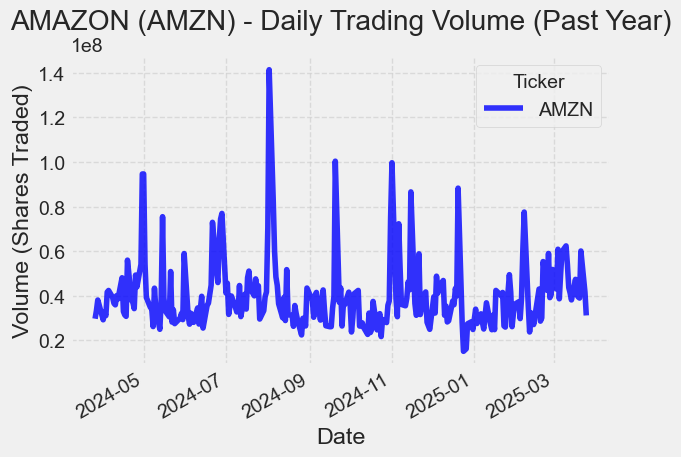

In [23]:
# Plot AMZN trading volume
plt.figure(figsize=(12, 6))
amzn['Volume'].plot(color='blue', alpha=0.8)  # Volume in blue
plt.title('AMAZON (AMZN) - Daily Trading Volume (Past Year)')
plt.ylabel('Volume (Shares Traded)')
plt.xlabel('Date')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

C:\Users\Oussama\AppData\Local\Temp\ipykernel_1032\3128690732.py:13: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(amzn[f'MA_{ma}'], color=color, linestyle='--',


<Figure size 1400x700 with 0 Axes>

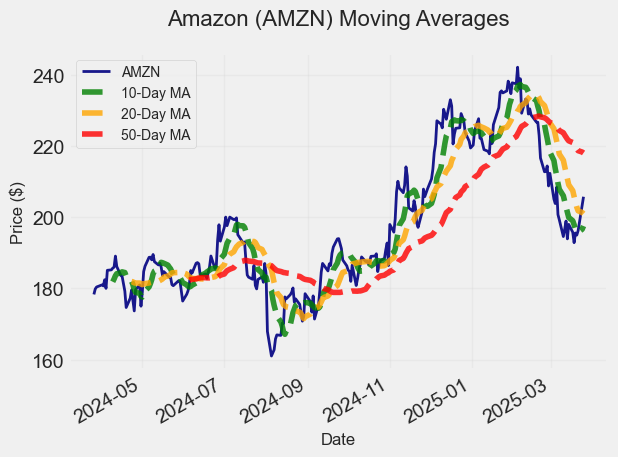

In [28]:
close_col = 'Adj Close' if 'Adj Close' in amzn.columns else 'Adj_Close' if 'Adj_Close' in amzn.columns else 'Close'

# Calculate moving averages
ma_day = [10, 20, 50]
for ma in ma_day:
    amzn[f'MA_{ma}'] = amzn[close_col].rolling(ma).mean()

# Plot with improved styling
plt.figure(figsize=(14, 7))
amzn[close_col].plot(color='navy', linewidth=2, label='AMZN Price', alpha=0.9)
colors = ['green', 'orange', 'red']
for ma, color in zip(ma_day, colors):
    plt.plot(amzn[f'MA_{ma}'], color=color, linestyle='--', 
             alpha=0.8, label=f'{ma}-Day MA')

plt.title('Amazon (AMZN) Moving Averages', fontsize=16, pad=20)
plt.ylabel('Price ($)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

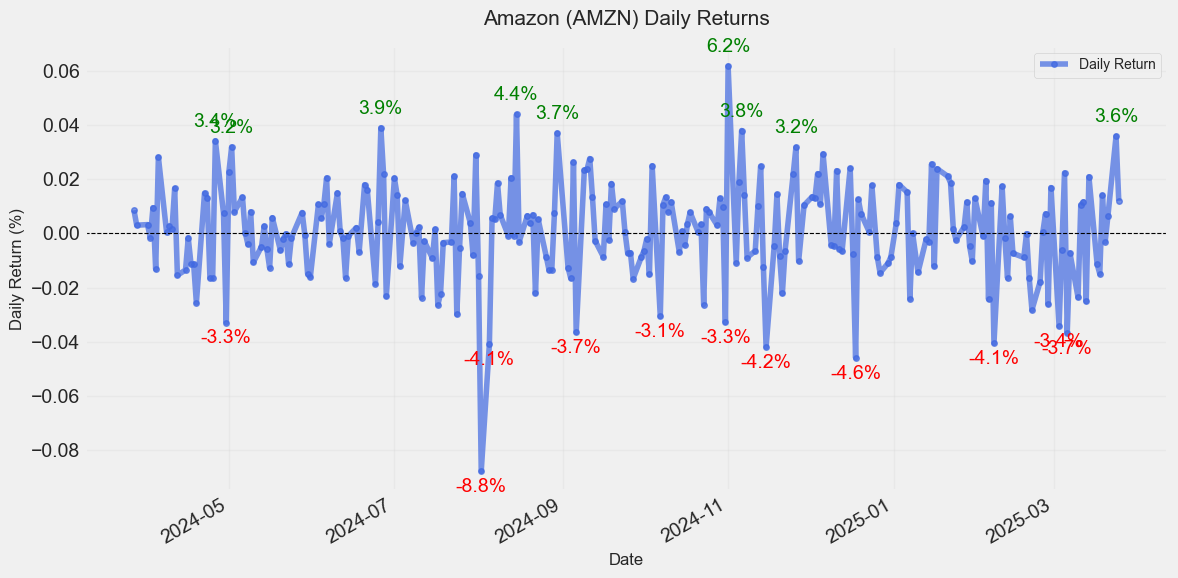

In [29]:
# Calculate and plot daily returns for AMZN only
plt.figure(figsize=(12, 6))

# Determine correct closing price column
close_col = 'Adj Close' if 'Adj Close' in amzn.columns else 'Adj_Close' if 'Adj_Close' in amzn.columns else 'Close'

# Calculate daily returns
amzn['Daily Return'] = amzn[close_col].pct_change()

# Plot with improved styling
amzn['Daily Return'].plot(
    linestyle='-', 
    marker='o',
    markersize=4,
    color='royalblue',
    alpha=0.7,
    label='Daily Return'
)

# Add reference lines and formatting
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Amazon (AMZN) Daily Returns', fontsize=15, pad=15)
plt.ylabel('Daily Return (%)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.2)

# Highlight significant moves
for x, y in zip(amzn.index, amzn['Daily Return']):
    if abs(y) > 0.03:  # Highlight returns > 3%
        plt.annotate(f"{y:.1%}", (x, y),
                    textcoords="offset points",
                    xytext=(0,10 if y>0 else -15),
                    ha='center',
                    color='red' if y < 0 else 'green')

plt.tight_layout()
plt.show()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

In [30]:
print("\nAMZN Daily Return Statistics:")
print(f"Average: {amzn['Daily Return'].mean():.2%}")
print(f"Max Gain: {amzn['Daily Return'].max():.2%}")
print(f"Max Loss: {amzn['Daily Return'].min():.2%}")
print(f"Volatility (std): {amzn['Daily Return'].std():.2%}")


AMZN Daily Return Statistics:
Average: 0.07%
Max Gain: 6.19%
Max Loss: -8.78%
Volatility (std): 1.78%


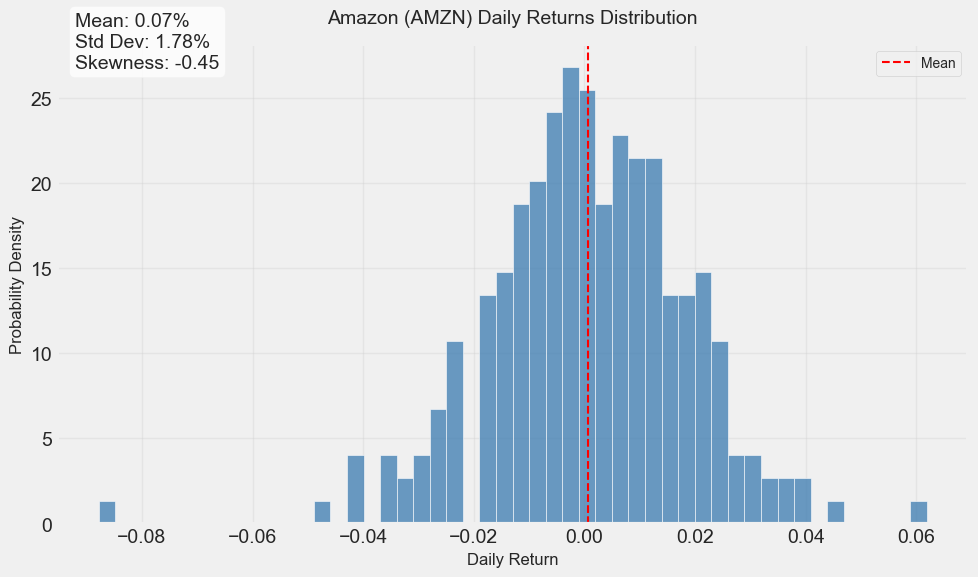

In [40]:
plt.figure(figsize=(10, 6))

# Determine correct closing price column
close_col = 'Adj Close' if 'Adj Close' in amzn.columns else 'Adj_Close' if 'Adj_Close' in amzn.columns else 'Close'

# Calculate daily returns if not already done
if 'Daily Return' not in amzn.columns:
    amzn['Daily Return'] = amzn[close_col].pct_change()

# Plot histogram with improved styling
amzn['Daily Return'].hist(bins=50, 
                         color='steelblue',
                         edgecolor='white',
                         alpha=0.8,
                         density=True)  # Show as probability density

# Add reference lines and formatting
plt.axvline(amzn['Daily Return'].mean(), color='red', linestyle='--', linewidth=1.5, label='Mean')
plt.title('Amazon (AMZN) Daily Returns Distribution', fontsize=14, pad=15)
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.grid(True, alpha=0.3)

# Add statistical annotations
stats_text = f"""Mean: {amzn['Daily Return'].mean():.2%}
Std Dev: {amzn['Daily Return'].std():.2%}
Skewness: {amzn['Daily Return'].skew():.2f}"""
plt.annotate(stats_text, xy=(0.02, 0.95), xycoords='axes fraction', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# 6. Predicting the closing price stock price of APPLE inc:

In [45]:
df = yf.download('AMZN', start='2012-01-01', end=datetime.now())
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2012-01-03,8.951500,8.974000,8.777500,8.794500,102216000
2012-01-04,8.875500,9.025000,8.803500,8.960500,84104000
2012-01-05,8.880500,8.912500,8.702500,8.797000,76182000
2012-01-06,9.130500,9.232500,8.875000,8.903500,140168000
2012-01-09,8.928000,9.218500,8.850000,9.138000,101138000
...,...,...,...,...,...
2025-03-19,195.539993,195.970001,191.960007,193.380005,39442900
2025-03-20,194.949997,199.320007,192.300003,193.070007,38921100


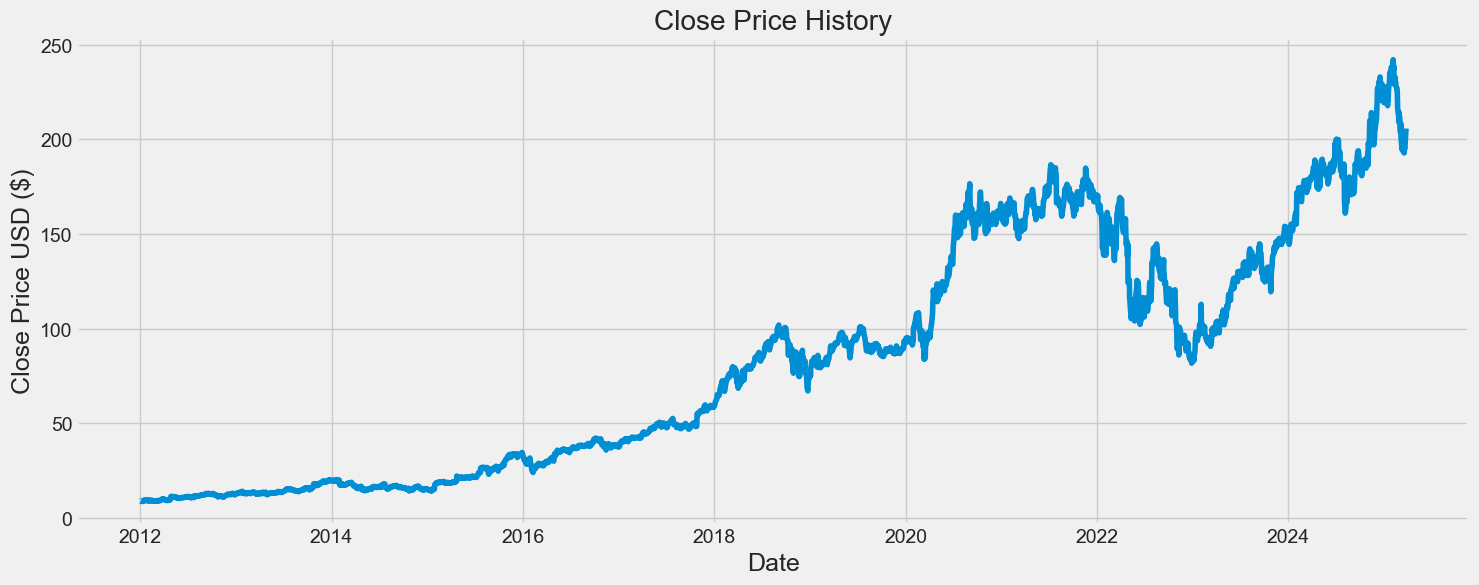

In [46]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [54]:
# 1. First inspect your column structure
print("Column structure:", df.columns.tolist())

# 2. For MultiIndex, find the Close price column
close_column = [col for col in df.columns if 'Close' in col][0]  # No .lower() needed
data = df[close_column].to_frame()  # Convert to DataFrame
dataset = data.values

# 3. Continue with your code
training_data_len = int(np.ceil(len(dataset) * .95))
print("Training data length:", training_data_len)

Column structure: [('Close', 'AMZN'), ('High', 'AMZN'), ('Low', 'AMZN'), ('Open', 'AMZN'), ('Volume', 'AMZN')]
Training data length: 3160


In [55]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[6.64483448e-04],
       [3.38670732e-04],
       [3.60106209e-04],
       ...,
       [8.03441210e-01],
       [8.33664489e-01],
       [8.44167685e-01]])

In [56]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00066448, 0.00033867, 0.00036011, 0.00143186, 0.00056374,
       0.00073093, 0.00063662, 0.        , 0.00053373, 0.00122822,
       0.00289587, 0.00396976, 0.00321525, 0.00217779, 0.00237285,
       0.00254433, 0.00372754, 0.00416696, 0.00347675, 0.00396762,
       0.00075665, 0.00124109, 0.00251861, 0.00154546, 0.00177053,
       0.00204704, 0.00193986, 0.0020599 , 0.00335672, 0.00329455,
       0.00183055, 0.0008574 , 0.00140828, 0.00135683, 0.00099673,
       0.00063447, 0.00068592, 0.00055731, 0.00168693, 0.00080595,
       0.00088098, 0.00072236, 0.00092813, 0.00110604, 0.0016805 ,
       0.00251004, 0.00179839, 0.00159905, 0.00185627, 0.00135683,
       0.00182197, 0.00195487, 0.00205561, 0.00351534, 0.00338673,
       0.00353034, 0.00409622, 0.00577459, 0.00632547, 0.00540804])]
[np.float64(0.0061475542960378465)]

[array([0.00066448, 0.00033867, 0.00036011, 0.00143186, 0.00056374,
       0.00073093, 0.00063662, 0.        , 0.00053373, 0.00122822,
       0.00289587, 0.

In [62]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import Input  # Added for proper input shape handling

# Build the LSTM model - PROPER WAY
model = Sequential([
    Input(shape=(x_train.shape[1], 1)),  # Proper input layer
    LSTM(128, return_sequences=True),
    LSTM(64, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model (using more epochs for better results)
history = model.fit(x_train, y_train, batch_size=1, epochs=10, validation_split=0.1)

# Save the trained model
model.save('stock-prediction1.h5')
print("Model saved as 'stock-prediction1.h5'")

Epoch 1/10
2790/2790 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - loss: 0.0016 - val_loss: 1.9684e-04
Epoch 2/10
2790/2790 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - loss: 3.4503e-04 - val_loss: 3.7943e-04
Epoch 3/10
2790/2790 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - loss: 2.9071e-04 - val_loss: 2.8669e-04
Epoch 4/10
2790/2790 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - loss: 2.6703e-04 - val_loss: 1.3667e-04
Epoch 5/10
2790/2790 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - loss: 2.2461e-04 - val_loss: 3.4578e-04
Epoch 6/10
2790/2790 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - loss: 1.9930e-04 - val_loss: 2.0274e-04
Epoch 7/10
2790/2790 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - loss: 1.8852e-04 - val_loss: 1.4696e-04
Epoch 8/10
2790/2790 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - loss: 2.2884e-04 - val_loss: 1.7630e-04
Epoch 9/10
2790/2790 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - loss: 1.5370e-04 - val_loss: 1.9410e-04
Epoch 10/10
2790/2790 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - loss: 2.0249e-04 - val_loss: 2.2586e-04


Model saved as 'stock-prediction1.h5'


In [64]:
from keras.models import load_model

loaded_model = load_model('stock-prediction1.h5')

loaded_model.compile(optimizer='adam', 
                    loss='mean_squared_error',
                    metrics=['mae'])  

print("Model successfully loaded and recompiled")

Model successfully loaded and recompiled


In [65]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = loaded_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


np.float64(6.603257014340678)

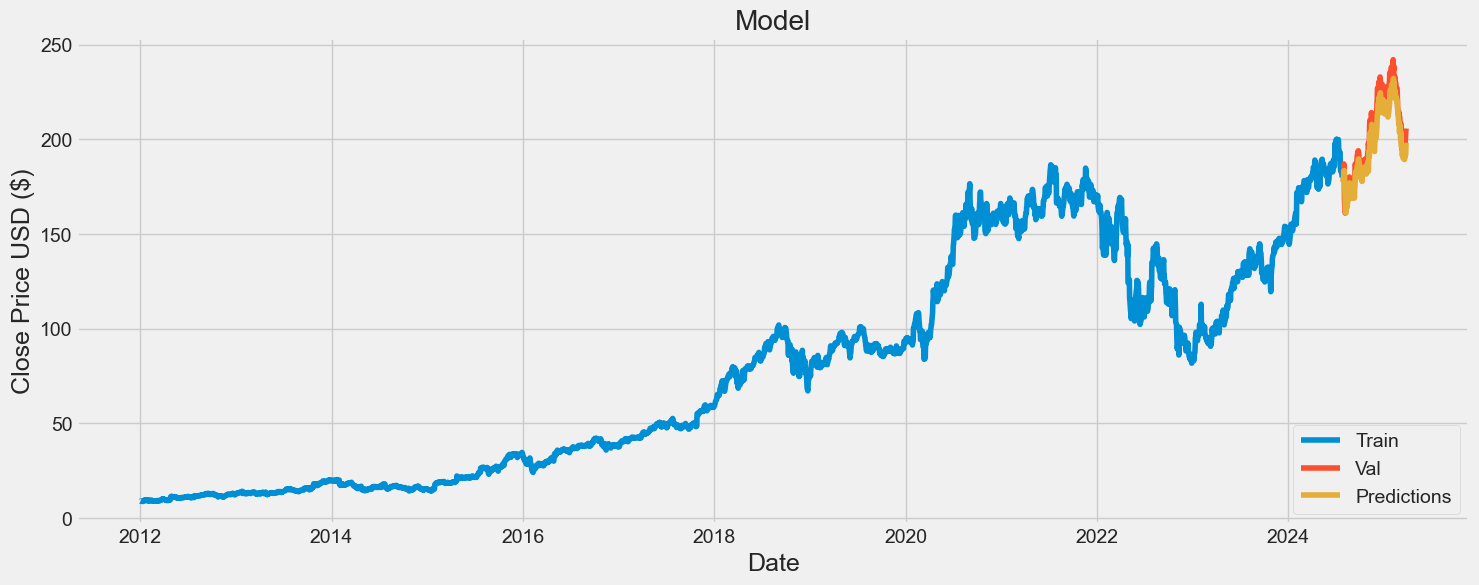

In [66]:
# First make a proper copy of the validation data
valid = data[training_data_len:].copy()  # Note the .copy() here

# Now safely add predictions
valid['Predictions'] = predictions

# Plotting code remains the same
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [60]:
# Show the valid and predicted prices
valid

,Close,Predictions
,AMZN,
Date,,
2024-07-26,182.500000,172.572678
2024-07-29,183.199997,172.293945
2024-07-30,181.710007,172.494980
2024-07-31,186.979996,172.477081
2024-08-01,184.070007,173.583817
...,...,...
2025-03-19,195.539993,185.175720
2025-03-20,194.949997,184.872971
